# Machine Learning Lab __ - Topic Name
<hr/>

Submitted by <br>
Name: **Stebin George** <br>
Register Number: **2122061** <br>
Class: **2MSCDS** <br> 
<hr/>

## Lab Overview  
### Objectives

The attached dataset has rent details of some houses in Lavasa.

Common Instructions
Use Pandas to Import the Dataset
Do the necessary Exploratory Data Analysis
Use the train_test_split method available in SCIKIT to split the dataset into Train Dataset and Test Dataset.
Show the Regression Score, Intercept and other parameters etc in the Output
Use visualizations and plots wherever possible
Format the outputs neatly; Do Documentation, Data Set Description, Objectives, Observations, Conclusions etc as you have done in your previous lab
Questions
1. What are your observations on the Dataset?
2. What are the different Error Measures (Evaluation Metrics) in relation to Linear Regression? How much do you get in the above cases?
3. Note down the errors/losses when the train-test ratio is 50:50, 60:40, 70:30, and 80:20
4. During LinearRegression() process, what is the impact of giving TRUE/FALSE as the value for Normalize Parameter?

Cases
Try to predict the rent of the below houses -
1. 1 BHK with 2 Baths in Portofino Street
2. Fully Furnished 2 BHK in School Street
3. Single Room anywhere in Lavasa

### Problem Definition
* familiarising with the concept of linear regression.
* getting familiarize with the syntax of linear regression
* pre processing & exploring the data for regression.



### Approach

* import all the libraries
* export the date and do some eda analysis
* Transport all categorical values into encoders.
* exporing the different options under linear regression in sklearn


### Sections
1) Introduction

2) Importanting libraries

3) cleaning data

4) Questions

5) conclusion


### References
* https://www.geeksforgeeks.org/linear-regression-python-implementation/
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


### Introduction:
**Linear regression is a common method to model the relationship between a dependent variable and one or more independent variables. Linear models are developed using the parameters which are estimated from the data. Linear regression is useful in prediction and forecasting where a predictive model is fit to an observed data set of values to determine the response. Linear regression models are often fitted using the least-squares approach where the goal is to minimize the error.**

### Step One: Import our libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from copy import copy

### Load the Data

In [47]:
x=pd.read_csv(r"C:\Users\stebi\Downloads\HousePrices - Lab3.csv")
x

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
0,Minimum Budget Rooms,Portofino H,1 BHK,400.0,1,1,1,1100.0
1,Minimum Budget Rooms,Portofino H,1 BHK,450.0,1,1,1,1100.0
2,Minimum Budget Rooms,School Street,1 BHK,530.0,1,1,0,1166.0
3,Minimum Budget Rooms,Portofino B,1 BHK,400.0,1,1,0,1400.0
4,Minimum Budget Rooms,School Street,2 BHK,460.0,1,1,0,1500.0
...,...,...,...,...,...,...,...,...
995,Super Furnished Villa,Portofino D,4 BHK,4900.0,4,6,3,70000.0
996,Super Furnished Villa,Portofino B,4 BHK,3750.0,4,5,0,76000.0
997,Super Furnished Villa,School Street,4 BHK,5270.0,4,5,3,80000.0
998,Super Furnished Villa,Portofino B,6 BHK,5100.0,7,6,3,90000.0


### Cleaning the data

In [48]:
x['Location'].value_counts()

Clubview Road    213
Portofino B      173
School Street    138
Portofino D      105
Portofino C      103
Portofino A       95
Portofino H       62
Portofino E       54
Portofino G       26
Portofino F       22
Starter Homes      9
Name: Location, dtype: int64

**Since portofino been splitted into various groups it has to be combined to a single location for effective data analysis.**

In [50]:
for i in x['Location']:
    if "Portofino" in i:
        x['Location'].replace({i:'Portofino'},inplace=True)
x

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
0,Minimum Budget Rooms,Portofino,1 BHK,400.0,1,1,1,1100.0
1,Minimum Budget Rooms,Portofino,1 BHK,450.0,1,1,1,1100.0
2,Minimum Budget Rooms,School Street,1 BHK,530.0,1,1,0,1166.0
3,Minimum Budget Rooms,Portofino,1 BHK,400.0,1,1,0,1400.0
4,Minimum Budget Rooms,School Street,2 BHK,460.0,1,1,0,1500.0
...,...,...,...,...,...,...,...,...
995,Super Furnished Villa,Portofino,4 BHK,4900.0,4,6,3,70000.0
996,Super Furnished Villa,Portofino,4 BHK,3750.0,4,5,0,76000.0
997,Super Furnished Villa,School Street,4 BHK,5270.0,4,5,3,80000.0
998,Super Furnished Villa,Portofino,6 BHK,5100.0,7,6,3,90000.0


In [51]:
x['Location'].value_counts()

Portofino        640
Clubview Road    213
School Street    138
Starter Homes      9
Name: Location, dtype: int64

#### Finding if null values are present:

In [52]:
display(x.isna().any())

BuildingType    False
Location        False
Size            False
AreaSqFt        False
NoOfBath        False
NoOfPeople      False
NoOfBalcony     False
RentPerMonth    False
dtype: bool

**There are no null values present in the daatset.**

In [53]:
x.duplicated().value_counts()

False    990
True      10
dtype: int64

In [54]:
duplicate = x[x.duplicated()]
duplicate

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
8,Semi Furnished Single Room,School Street,1 BHK,645.0,1,1,1,1645.0
37,Semi Furnished Single Room,School Street,2 BHK,1015.0,2,1,2,2588.0
40,Minimum Budget Rooms,Portofino,1 BHK,525.0,1,1,1,2600.0
190,Semi Furnished Single Room,Portofino,2 BHK,883.0,2,1,1,4500.0
277,Minimum Budget Rooms,Portofino,2 BHK,1200.0,2,1,2,5000.0
295,Semi Furnished Single Room,Portofino,2 BHK,1200.0,2,2,2,5200.0
296,Semi Furnished Single Room,Portofino,2 BHK,1200.0,2,2,2,5200.0
335,Semi Furnished Single Room,Portofino,2 BHK,1200.0,2,2,2,5500.0
354,Semi Furnished Single Room,Clubview Road,3 BHK,1464.0,3,2,2,5600.0
450,Semi Furnished Flat,School Street,2 BHK,1200.0,2,2,1,6500.0


**The above mentioned are the 10 duplicate rows in the dataframe**

### Usuage of encoders to deal with categorical values:

In [55]:
label_encoder = preprocessing.LabelEncoder()
x['BuildingType']= label_encoder.fit_transform(data['BuildingType'])
x['Location']= label_encoder.fit_transform(data['Location'])
x['Size']= label_encoder.fit_transform(data['Size'])
x.head()

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
0,3,8,0,400.0,1,1,1,1100.0
1,3,8,0,450.0,1,1,1,1100.0
2,3,9,0,530.0,1,1,0,1166.0
3,3,2,0,400.0,1,1,0,1400.0
4,3,9,2,460.0,1,1,0,1500.0


### Exploring the dataset:

### 1. What are your observations on the Dataset?

**The attached dataset has rent details of some houses in Lavasa.**


### Creating a summary out of the entire dataframe

In [56]:
x.describe()

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.834000,3.582000,2.716000,1548.270010,2.661000,2.168000,1.544000,10476.633500
std,1.946852,3.167856,1.285689,1345.141175,1.247251,0.959529,0.838312,10509.508971
min,0.000000,0.000000,0.000000,375.000000,1.000000,1.000000,0.000000,1100.000000
25%,3.000000,1.000000,2.000000,1090.000000,2.000000,2.000000,1.000000,4890.500000
50%,4.000000,3.000000,3.000000,1270.000000,2.000000,2.000000,2.000000,7000.000000
75%,5.000000,6.000000,3.000000,1664.250000,3.000000,2.000000,2.000000,11925.000000
max,9.000000,10.000000,9.000000,35000.000000,11.000000,6.000000,3.000000,96000.000000


In [57]:
x.columns

Index(['BuildingType', 'Location', 'Size', 'AreaSqFt', 'NoOfBath',
       'NoOfPeople', 'NoOfBalcony', 'RentPerMonth'],
      dtype='object')

**'BuildingType', 'Location', 'Size', 'AreaSqFt', 'NoOfBath','NoOfPeople', 'NoOfBalcony', 'RentPerMonth' are the different columns in the dataframe.**

### Plotting the various graphs:

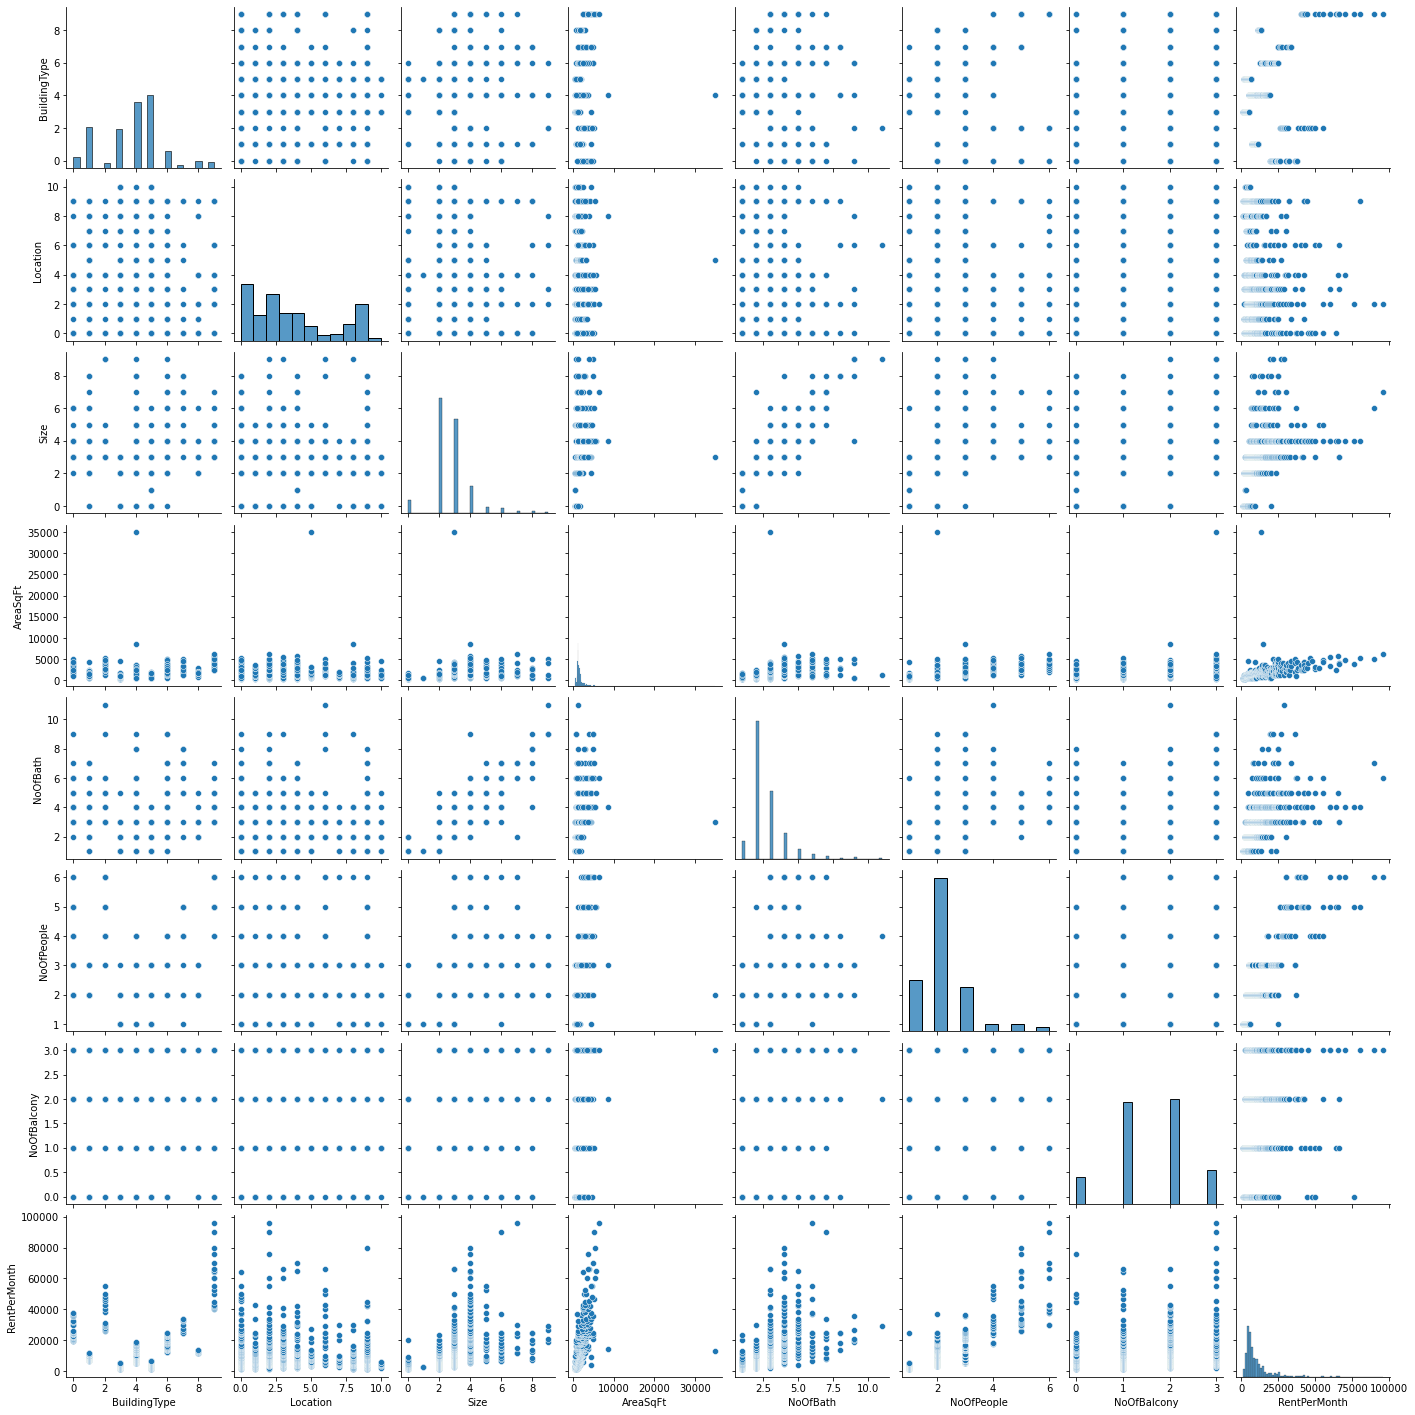

In [58]:
sns.pairplot(x)

#### Correlation relations between the features.

In [59]:
x.corr()

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
BuildingType,1.000000,-0.032037,0.031935,0.057975,0.012666,0.077638,0.003866,0.174447
Location,-0.032037,1.000000,-0.026473,-0.010202,-0.030073,-0.011123,-0.033399,-0.055946
Size,0.031935,-0.026473,1.000000,0.325890,0.873126,0.441985,0.262365,0.508411
AreaSqFt,0.057975,-0.010202,0.325890,1.000000,0.375791,0.374907,0.206123,0.473022
NoOfBath,0.012666,-0.030073,0.873126,0.375791,1.000000,0.480063,0.258885,0.579693
NoOfPeople,0.077638,-0.011123,0.441985,0.374907,0.480063,1.000000,0.184932,0.782853
NoOfBalcony,0.003866,-0.033399,0.262365,0.206123,0.258885,0.184932,1.000000,0.193619
RentPerMonth,0.174447,-0.055946,0.508411,0.473022,0.579693,0.782853,0.193619,1.000000


#### Heatmap of the entire features:

<AxesSubplot:>

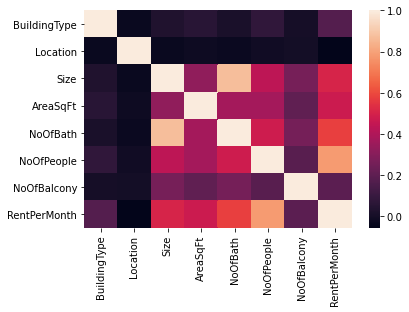

In [15]:
sns.heatmap(x.corr())

**The above graph shows that the Rentpermonth and the no.of.people are highly corelated.**

**Graph shows the distribution of different features**

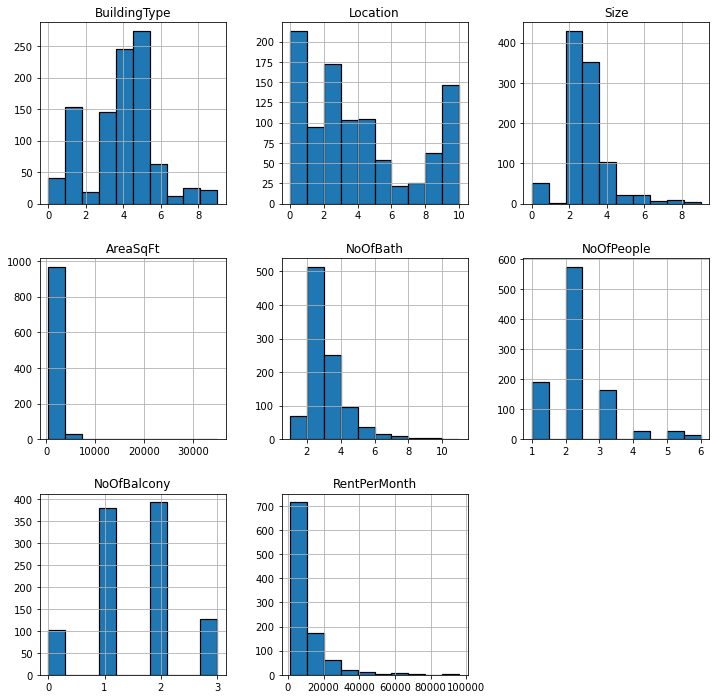

In [60]:
x.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

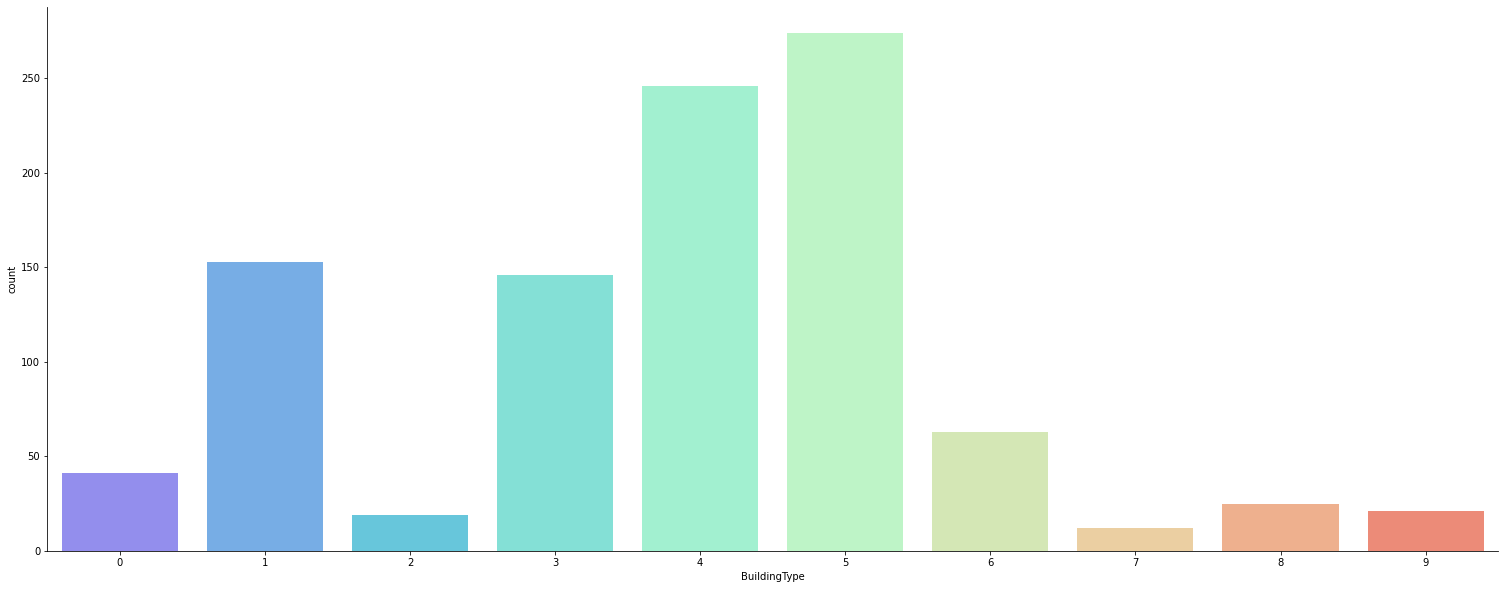

In [61]:
plt.figure(figsize = [26,10])
sns.countplot(x = 'BuildingType', palette = "rainbow", alpha = 0.7, data = x)
sns.despine()

- From this countplot we can see that maximum house are Semi Furnished Single Room or Semi Furnished Flat.

C:\Users\stebi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AreaSqFt', ylabel='Density'>

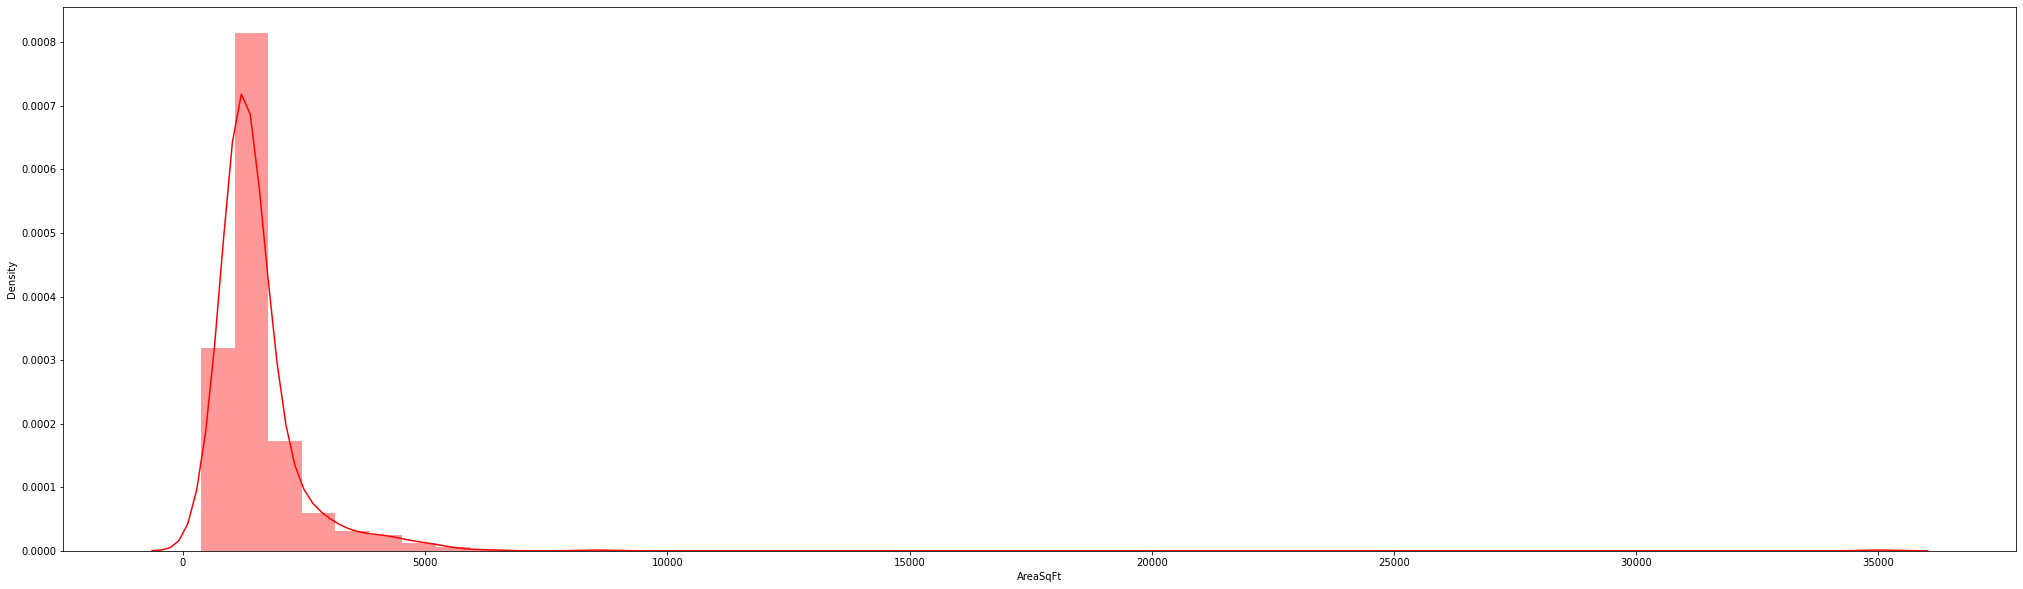

In [62]:
plt.figure(figsize=(35,10))
sns.distplot(x['AreaSqFt'], color = 'red')

- The area square feet of major rental properties is ranging between 400 to 2500 area sq. ft.

C:\Users\stebi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RentPerMonth', ylabel='Density'>

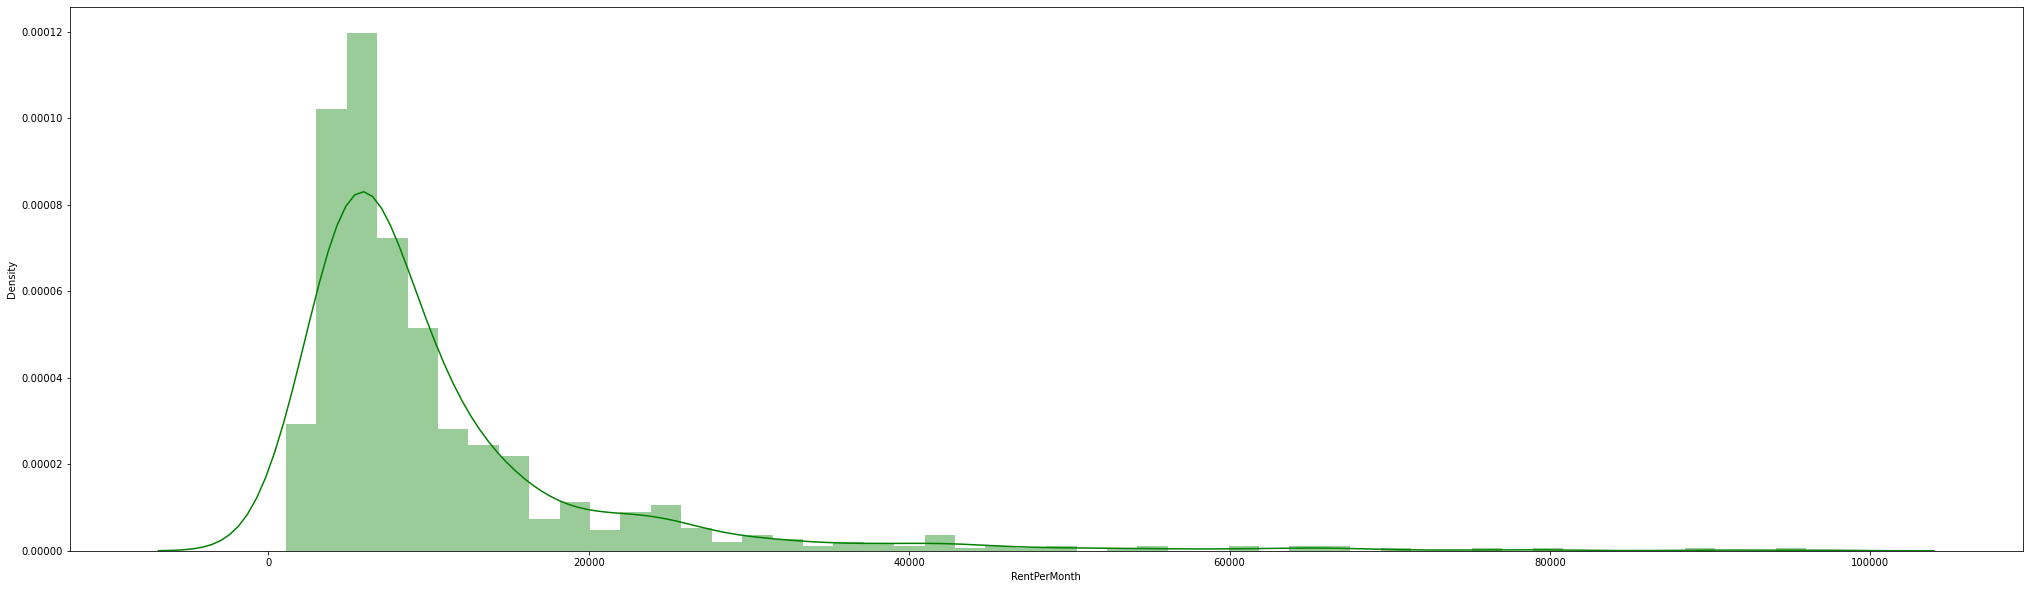

In [26]:
plt.figure(figsize=(35,10))
sns.distplot(x['RentPerMonth'], color = 'green')

- The rent for major properties lie under the range of Rs 1100 to Rs 10000.

### 2. What are the different Error Measures (Evaluation Metrics) in relation to Linear Regression? How much do you get in the above cases?

### Evaluation Metrices:


**1) Mean Absolute Error (MAE):** Is the mean of the absolute value of the errors. This metric gives an idea of magnitude but no idea of direction (too high or too low).

__from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))__


**2) Mean Squared Error (MSE):** Is the mean of the squared errors.MSE is more popular than MAE because MSE "punishes" more significant errors.

__from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))__

**3) Root Mean Squared Error (RMSE):** Is the square root of the mean of the squared errors. RMSE is even more favored because it allows us to interpret the output in y-units.

__print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))__

**4) Root Mean Squared Log Error(RMSLE)**
Taking the log of the RMSE metric slows down the scale of error. The metric is very helpful when you are developing a model without calling the inputs. In that case, the output will vary on a large scale.

__print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))__

**5) R Squared (R2):** R2 score is a metric that tells the performance of your model, not the loss in an absolute sense that how many wells did your model perform.

__from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)__

### 3. Note down the errors/losses when the train-test ratio is 50:50, 60:40, 70:30, and 80:20

In [83]:
lst=[.5,.6,.7,.8]
for i in lst:
    X_train,X_test,y_train,y_test=model_selection.train_test_split(x.iloc[:,0:7],x['RentPerMonth'],train_size=i,random_state=6)
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_predict=model.predict(X_test)
    mse=metrics.mean_squared_error(y_test,y_predict)
    rmse = (np.sqrt(mse))
    r2 =metrics.r2_score(y_test, y_predict)
    print(f"\033[0m TRAIN SIZE\033[1m:{i*100}% ")
    print(f'\033[0mSlope\033[1m: {model.coef_}')
    print(f'\033[0mIntercept\033[1m:{model.intercept_}')
    print(f'\033[0mMSE:\033[1m: {mse}')
    print(f'\033[0mRoot mean squared error\033[1m: {rmse}')
    print(f'\033[0mR2 score:\033[1m:{r2}')
    print("\n")

 TRAIN SIZE:50.0% 
Slope: [ 8.27014737e+02 -7.86842247e+01 -3.45197193e+02  8.46059724e-01
  2.35243954e+03  7.13149160e+03 -1.62561404e+02]
Intercept:-14086.416267470635
MSE:: 29671115.883120798
Root mean squared error: 5447.1199622480135
R2 score::0.6897971325198762


 TRAIN SIZE:60.0% 
Slope: [ 6.39575080e+02 -1.26588387e+02 -2.14164052e+02  8.77543116e-01
  2.38334795e+03  6.81786188e+03 -1.50943174e+02]
Intercept:-13159.619546028583
MSE:: 27844585.518103708
Root mean squared error: 5276.79689945555
R2 score::0.7187844217073731


 TRAIN SIZE:70.0% 
Slope: [ 5.54510968e+02 -1.09579548e+02 -3.25118155e+02  9.53007779e-01
  2.42496980e+03  6.73863593e+03 -1.65545237e+02]
Intercept:-12747.067880854738
MSE:: 28617931.00262994
Root mean squared error: 5349.572973857815
R2 score::0.7467658034822383


 TRAIN SIZE:80.0% 
Slope: [ 5.74625788e+02 -8.50369121e+01 -5.13867060e+02  1.06021760e+00
  2.49851334e+03  6.53701164e+03 -1.11431261e+02]
Intercept:-12435.682155419774
MSE:: 30236732.21071

**From the above block of codes it is visible that as the train size increases the better the model performs throughout**

### ACCURACY VS RANDOM_STATE:

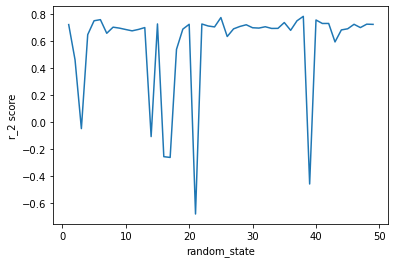

In [64]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
l=[]
m=[]
for i in range(1,50):
    X_train,X_test,y_train,y_test=model_selection.train_test_split(x.iloc[:,0:7],x['RentPerMonth'],train_size=.8,random_state=i)
    m.append(i)
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_predict=model.predict(X_test)
    l.append(metrics.r2_score(y_test,y_predict))
plt.plot(m,l)
plt.xlabel("random_state")
plt.ylabel("r_2 score")
plt.show()

**For the random state of 2 the graph has the maximum R2 value.**

### 4. During LinearRegression() process, what is the impact of giving TRUE/FALSE as the value for Normalize Parameter?

In [84]:
lst=[.5,.6,.7,.8]
ls2=[False,True]
for i in lst:
    for j in ls2:
        X_train,X_test,y_train,y_test=model_selection.train_test_split(x.iloc[:,0:7],x['RentPerMonth'],train_size=i,random_state=6)
        model = LinearRegression(normalize=j)
        model.fit(X_train,y_train)
        y_predict=model.predict(X_test)
        mse=metrics.mean_squared_error(y_test,y_predict)
        rmse = (np.sqrt(mse))
        r2 =metrics.r2_score(y_test, y_predict)
        print(f"\033[1m normalizer = {j} \033[0m")
        print(f"\033[0m TRAIN SIZE\033[1m:{i*100}% ")
        print(f'\033[0mSlope\033[1m: {model.coef_}')
        print(f'\033[0mIntercept\033[1m:{model.intercept_}')
        print(f'\033[0mMSE:\033[1m: {mse}')
        print(f'\033[0mRoot mean squared error\033[1m: {rmse}')
        print(f'\033[0mR2 score:\033[1m:{r2}')
        print("\n")

 normalizer = False 
 TRAIN SIZE:50.0% 
Slope: [ 8.27014737e+02 -7.86842247e+01 -3.45197193e+02  8.46059724e-01
  2.35243954e+03  7.13149160e+03 -1.62561404e+02]
Intercept:-14086.416267470635
MSE:: 29671115.883120798
Root mean squared error: 5447.1199622480135
R2 score::0.6897971325198762


 normalizer = True 
 TRAIN SIZE:50.0% 
Slope: [ 8.27014737e+02 -7.86842247e+01 -3.45197193e+02  8.46059724e-01
  2.35243954e+03  7.13149160e+03 -1.62561404e+02]
Intercept:-14086.416267470642
MSE:: 29671115.88312082
Root mean squared error: 5447.119962248015
R2 score::0.689797132519876


 normalizer = False 
 TRAIN SIZE:60.0% 
Slope: [ 6.39575080e+02 -1.26588387e+02 -2.14164052e+02  8.77543116e-01
  2.38334795e+03  6.81786188e+03 -1.50943174e+02]
Intercept:-13159.619546028583
MSE:: 27844585.518103708
Root mean squared error: 5276.79689945555
R2 score::0.7187844217073731


 normalizer = True 
 TRAIN SIZE:60.0% 
Slope: [ 6.39575080e+02 -1.26588387e+02 -2.14164052e+02  8.77543116e-01
  2.38334795e+03  6

**A linear regression has the same predictive power evenafter normalizing the data. Therefore, using normalize=True has no impact on the predictions. But there is an significant difference when a scalers are used in the model:**

### Using a scaler-MinMaxscaler:

In [85]:
scaler=MinMaxScaler()
x1=copy(x)
x1[['AreaSqFt', 'NoOfBath',
       'NoOfPeople', 'NoOfBalcony']]=scaler.fit_transform(x1[['AreaSqFt', 'NoOfBath',
       'NoOfPeople', 'NoOfBalcony']])

In [33]:
lst=[.5,.6,.7,.8]
for i in lst:
    X_train,X_test,y_train,y_test=model_selection.train_test_split(x1.iloc[:,0:7],x1['RentPerMonth'],train_size=i,random_state=8)
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_predict=model.predict(X_test)
    mse=metrics.mean_squared_error(y_test,y_predict)
    rmse = (np.sqrt(mse))
    r2 =metrics.r2_score(y_test, y_predict)
    print(f"\033[0m TRAIN SIZE\033[1m:{i*100}% ")
    print(f'\033[0mSlope\033[1m: {model.coef_}')
    print(f'\033[0mIntercept\033[1m:{model.intercept_}')
    print(f'\033[0mMSE:\033[1m: {mse}')
    print(f'\033[0mRoot mean squared error\033[1m: {rmse}')
    print(f'\033[0mR2 score:\033[1m:{r2}')
    print("\n")

 TRAIN SIZE:50.0% 
Slope: [  567.38781518  -535.3137786   -183.64862453 23809.84909379
 20151.13208052 32458.84599928  -771.5851344 ]
Intercept:-2251.631438103401
MSE:: 34088131.59190207
Root mean squared error: 5838.504225561721
R2 score::0.7197677115743534


 TRAIN SIZE:60.0% 
Slope: [ 5.75240563e+02 -6.99326029e+02 -1.40250851e+02  3.00744972e+04
  2.02385704e+04  3.31670498e+04  1.62216854e+01]
Intercept:-2911.809752198409
MSE:: 28654924.316099804
Root mean squared error: 5353.029452198055
R2 score::0.7410641775156243


 TRAIN SIZE:70.0% 
Slope: [  611.44489248  -685.93730196  -264.47470297 34763.48014261
 21130.27866739 33816.65180855   155.93385933]
Intercept:-3200.571917956371
MSE:: 26674765.43777921
Root mean squared error: 5164.761895555226
R2 score::0.7292451638110509


 TRAIN SIZE:80.0% 
Slope: [  536.55702071  -589.23077691  -221.20341919 36625.67389338
 21422.70227394 33199.13182682  -338.28666073]
Intercept:-2918.5565077563024
MSE:: 27231758.10778498
Root mean squared err

### Cases:

### Try to predict the rent of the below houses :

In [95]:
data3 = pd.DataFrame()
print("Please select the features from the list with their index numbers (Leave Empty For Random) ")
print("\n")

dict1 = {1: 'Minimum Budget Rooms',2: 'Semi Furnished Single Room',3:'Semi Furnished Flat',
                 4:'Fully Furnished Single Room',5:'Super Furnished Single Room',6:'Semi Furnished Villa',
                 7:'Fully Furnished Flat',8: 'Super Furnished Flat',9:'Fully Furnished Villa', 10:'Super Furnished Villa'}
print(dict1)
ip = int(input("Please select any one type of buidling type: "))

data = pd.read_csv(r"C:\Users\stebi\Downloads\HousePrices - Lab3.csv")
le = preprocessing.LabelEncoder()
le.fit(data['BuildingType'])
data3['BuildingType'] = [le.transform([dict1[ip]])[0]]



    
print("\n")
dict2={1:'Portofino', 2:'School Street', 3:'Clubview Road', 4:'Starter Homes'}
print(dict2)
ip = int(input("Please select any one type of location: "))
data = pd.read_csv(r"C:\Users\stebi\Downloads\HousePrices - Lab3.csv")
data["Location"] = data["Location"].replace(to_replace =["Portofino A","Portofino B","Portofino C","Portofino D","Portofino E","Portofino F","Portofino G","Portofino H"], value ="Portofino")
le = preprocessing.LabelEncoder()
le.fit(data['Location'])
data3['Location'] = [le.transform([dict2[ip]])[0]]

print("\n")    
dict3={1: '1 BHK', 2: '2 BHK', 3: '1 RK', 4: '3 BHK', 5: '4 BHK',6: '5 BHK', 7:'6 BHK',8:'8 BHK', 9:'7 BHK', 
               10:'9 BHK'}
print(dict3)
ip = int(input("Please select any one type of size: "))
data = pd.read_csv(r"C:\Users\stebi\Downloads\HousePrices - Lab3.csv")
le = preprocessing.LabelEncoder()
le.fit(data['Size'])
data3['Size'] = [le.transform([dict3[ip]])[0]]

    

    
print("\n")
ip = int(input("select square feet area available"))
data3["AreaSqFt"] = ip

        

        
print("\n")    
ip = int(input("Please select number of baths you would like to have"))
data3["NoOfBath"] = ip

        
        
        
print("\n")    
ip = int(input("How many people wish to stay in the property"))
data3["NoOfPeople"] = ip

        
        
        
print("\n")    
ip = int(input("Please select number of balcony's you would like to have"))
data3["NoOfBalcony"] = ip

y_prediction =  model.predict(data3)
print("You selected following features with values: \n",data3.head())
print("\033[1mPredicted Rent is:\033[0m" ,y_prediction)

Please select the features from the list with their index numbers (Leave Empty For Random) 


{1: 'Minimum Budget Rooms', 2: 'Semi Furnished Single Room', 3: 'Semi Furnished Flat', 4: 'Fully Furnished Single Room', 5: 'Super Furnished Single Room', 6: 'Semi Furnished Villa', 7: 'Fully Furnished Flat', 8: 'Super Furnished Flat', 9: 'Fully Furnished Villa', 10: 'Super Furnished Villa'}
Please select any one type of buidling type: 1


{1: 'Portofino', 2: 'School Street', 3: 'Clubview Road', 4: 'Starter Homes'}
Please select any one type of location: 1


{1: '1 BHK', 2: '2 BHK', 3: '1 RK', 4: '3 BHK', 5: '4 BHK', 6: '5 BHK', 7: '6 BHK', 8: '8 BHK', 9: '7 BHK', 10: '9 BHK'}
Please select any one type of size: 2


select square feet area available5000


Please select number of baths you would like to have1


How many people wish to stay in the property2


Please select number of balcony's you would like to have1
You selected following features with values: 
    BuildingType  Location  Size  

**The predicted rent is 8937 for the given details**

#### Conclusion:
through this section the details about the linear regression is being studied and applied in a real world problem.